# Predicting Price of Bitcoin

## Project Description

### Type of problem,subtype

1.Bitcoin price prediction is a supervised learning algorithm and falls under subtype Regression Analysis

2.Supervised learning is a learning in which we train the machine using data which is well labelled that means some data is already tagged with the correct answer.

3.The machine is provided with a new set of example so that supervised learning algo analyse the training data and produces a correct output from labelled data.

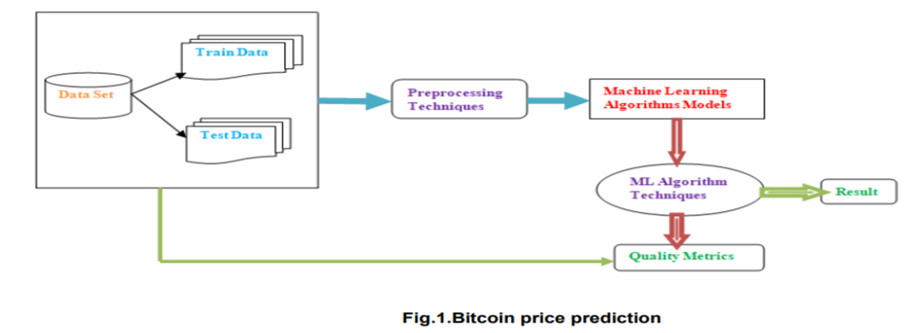

### Applicable Alforithm

In Machine Learning :- Bayesian Regression and GLM
                       Random forest
                       
In Deep Learning :- SVM(Support Vector Machine)Algorithm

                    CNN(Convolutional Neural Networks)
                    
                    RNN(Recurrent neural networks)

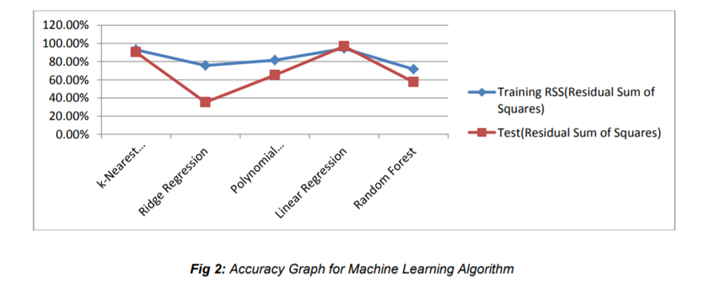

### Dataset Description

Close :- latest trade 

Open :- opening trade 

High :- highest trade during day 

Low :- lowest trade during day 

Average :- average of all four(close, open, high, low)

Volume_(BTC) :- total trade volume of day in BTC 

Date :- day of trade

Target Column :- close


## Packages Import

In [1]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("Pandas version: {}".format(pd.__version__))
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib as mat
print("Matplotlib version: {}".format(mat.__version__))
from matplotlib import pyplot as plt
import numpy as np
print("Numpy version: {}".format(np.__version__))
import scipy as sp
print("Scipy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("Scikit-learn version: {}".format(sklearn.__version__))
import math
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#import mglearn
%matplotlib notebook

Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Pandas version: 0.25.1
Matplotlib version: 3.1.1
Numpy version: 1.16.5
Scipy version: 1.3.1
IPython version: 7.8.0
Scikit-learn version: 0.21.3


## Front Page

'left, bottom, width, height = [0.3, 0.05, 0.4, 0.3]\nax4 = fig.add_axes([left, bottom, width, height])\nax4.axis("off")\nax4.set_xticks([])\nax4.set_yticks([])\nimg = Image.open(r"H:\\pythonfile\\project\\project_images\teams.jpg")\nplt.imshow(img)\nplt.show()'

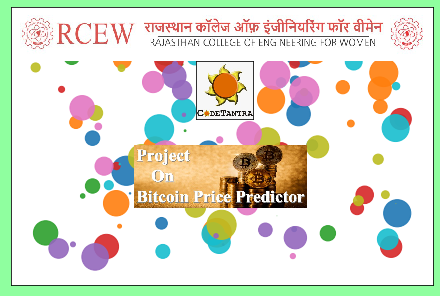

In [11]:
fig=plt.figure(constrained_layout=True)
gs=fig.add_gridspec(4,6)
fig.patch.set_facecolor('xkcd:mint green')
#ax1
ax1=fig.add_subplot(gs[0:,:])
np.random.seed(19680801)
for color in ['tab:blue', 'tab:orange', 'tab:green','tab:red','tab:cyan','tab:olive','tab:purple','tab:pink']:
    N = 15
    x = np.random.rand(N)
    y = np.random.rand(N)
    area = (30 * np.random.rand(N))**2
    ax1.set_xticks([])
    ax1.set_yticks([])
    #ax1.patch.set_facecolor("black")
    ax1.scatter(x, y, s=area, c=color, alpha=0.9)
#subgraph1
left, bottom, width, height = [0.02, 0.8, 0.97, 0.18]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.axis("off")
ax2.set_xticks([])
ax2.set_yticks([])
img = Image.open(r"H:\pythonfile\project\project_images\rcewbanner.jpg")
plt.imshow(img)
#subgraph2
left, bottom, width, height = [0.41, 0.6, 0.2, 0.2]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xticks([])
ax3.set_yticks([])
img = Image.open(r"H:\pythonfile\project\project_images\codetantra.jpeg")
plt.imshow(img)
#subgraph3
left, bottom, width, height = [0.3, 0.2,0.4,0.4]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.axis("off")
ax3.set_xticks([])
ax3.set_yticks([])
img = Image.open(r"H:\pythonfile\project\project_images\pnamme.jpg")
plt.imshow(img)
#subgraph4
"""left, bottom, width, height = [0.3, 0.05, 0.4, 0.3]
ax4 = fig.add_axes([left, bottom, width, height])
ax4.axis("off")
ax4.set_xticks([])
ax4.set_yticks([])
img = Image.open(r"H:\pythonfile\project\project_images\teams.jpg")
plt.imshow(img)
plt.show()"""


## Loading & Getting Ready data

In [3]:
#convert date
bitcoindf=pd.read_csv(r'H:\pythonfile\project\prog&datafile\bitcoin_dataset.csv',parse_dates=["date"]).fillna(0)
for i in range(len(bitcoindf["date"])):
    bitcoindf["date"][i]=int(bitcoindf["date"][i].strftime("%Y%m%d"))

#Convert to numeric
bitcoindf=bitcoindf.astype('float32')
#bitcoindf["prediction"]=bitcoindf["close"].shift(-30)
#bitcoindf.dropna(inplace=True)

print("Keys of bitcoin_dataset: \n{}".format(bitcoindf.keys()))
print(bitcoindf.describe())
print(bitcoindf.info())
print(bitcoindf.shape)

Keys of bitcoin_dataset: 
Index(['date', 'open', 'high', 'low', 'close', 'prediction'], dtype='object')
               date          open          high           low         close  \
count  2.042000e+03   2042.000000   2042.000000   2042.000000   2042.000000   
mean   2.015673e+07   2285.456055   2354.447021   2207.496094   2287.287354   
std    1.629060e+04   3438.652100   3563.971191   3285.671143   3438.366455   
min    2.013010e+07     68.500000     74.559998     65.529999     68.430000   
25%    2.014092e+07    320.589996    329.069992    313.412491    321.134995   
50%    2.016021e+07    598.015015    607.364990    587.274994    598.140015   
75%    2.017071e+07   2607.887573   2749.389954   2536.247559   2608.679993   
max    2.018121e+07  19475.800781  20089.000000  18974.099609  19497.400391   

         prediction  
count   2042.000000  
mean    2285.515625  
std     3439.515869  
min        0.000000  
25%      321.134995  
50%      598.140015  
75%     2608.679993  
max    1

## Discriptive Statistics

In [4]:
set_option('display.width',100)
set_option('precision',1)
print("***Description***")
description=bitcoindf.describe()
print(description)
#data types
print("***data types***")
types=bitcoindf.dtypes
print(types)
#shape
print("***shape***")
shape=bitcoindf.shape
print(shape)
peek=bitcoindf.head(12)
print("***Head - top 12 rows***")
print(peek)
#class counts
print("***class counts***")
class_counts=bitcoindf.groupby('prediction').size()
print(class_counts)
#pearson correlations
print("***Pearson correlation matrix***")
set_option('precision',3)
correlations=bitcoindf.corr(method='pearson')
print(correlations)
#skewness of each attribute
print("***Skewness***")
skew=bitcoindf.skew()
print(skew)

***Description***
          date     open     high      low    close  prediction
count  2.0e+03   2042.0   2042.0   2042.0   2042.0      2042.0
mean   2.0e+07   2285.5   2354.4   2207.5   2287.3      2285.5
std    1.6e+04   3438.7   3564.0   3285.7   3438.4      3439.5
min    2.0e+07     68.5     74.6     65.5     68.4         0.0
25%    2.0e+07    320.6    329.1    313.4    321.1       321.1
50%    2.0e+07    598.0    607.4    587.3    598.1       598.1
75%    2.0e+07   2607.9   2749.4   2536.2   2608.7      2608.7
max    2.0e+07  19475.8  20089.0  18974.1  19497.4     19497.4
***data types***
date          float32
open          float32
high          float32
low           float32
close         float32
prediction    float32
dtype: object
***shape***
(2042, 6)
***Head - top 12 rows***
       date   open   high    low  close  prediction
0   2.0e+07  135.3  136.0  132.1  134.2       129.0
1   2.0e+07  134.4  147.5  134.0  144.5       132.3
2   2.0e+07  144.0  146.9  134.1  139.0       128

## Visualization -single variable - univariate plots

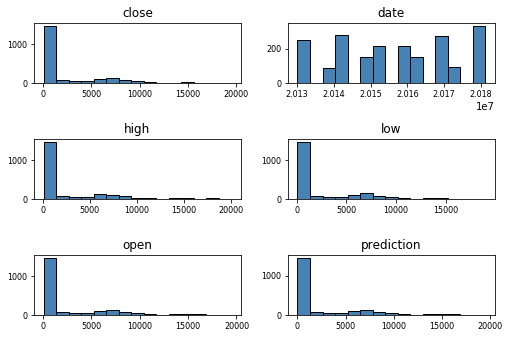

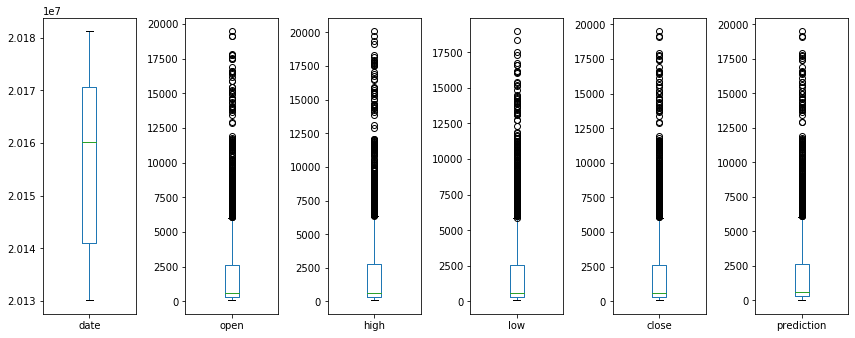

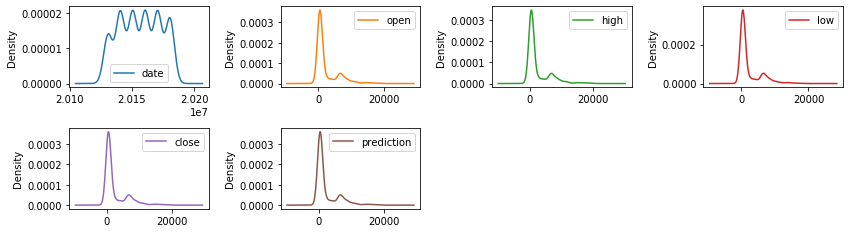

In [5]:
#univariate plots-Histogram
bitcoindf.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()
#univariate plots-Box plots
bitcoindf.plot(kind='box',subplots=True,sharex=False,sharey=False)
plt.tight_layout(rect=(0, 0, 2.0, 1.2))
plt.show()
#univariate plot-Density plot
bitcoindf.plot(kind='density',subplots=True,sharex=False,sharey=False,layout=(3,4))
plt.tight_layout(rect=(0, 0, 2.0, 1.2))
plt.show()


## Multivariate Plots

              date    open    high     low   close  prediction
date        1.0000  0.6941  0.6889  0.7014  0.6936      0.6535
open        0.6941  1.0000  0.9989  0.9981  0.9977      0.8921
high        0.6889  0.9989  1.0000  0.9979  0.9991      0.8951
low         0.7014  0.9981  0.9979  1.0000  0.9987      0.8939
close       0.6936  0.9977  0.9991  0.9987  1.0000      0.8957
prediction  0.6535  0.8921  0.8951  0.8939  0.8957      1.0000


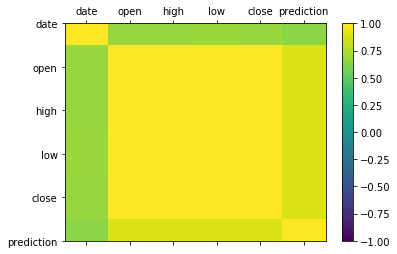

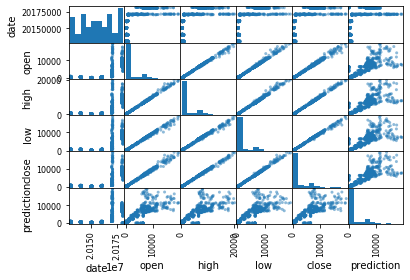

In [6]:
names=['date','open','high','low','close','prediction']
set_option('display.width',100)
set_option('precision',4)
correlations=bitcoindf.corr()
print(correlations)
#plot correlation matrix
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
scatter_matrix(bitcoindf)
plt.show()

# Prediction

## Create the independent dataset (Xdata)

In [7]:
bitcoindf.drop(['date','open','high','low'],1,inplace=True)

In [8]:
prediction_days=30
# Convert the dataframe to a numpy array and drop the prediction column
Xdata = np.array(bitcoindf.drop(['prediction'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
Xdata= Xdata[:len(bitcoindf)-prediction_days]
print(Xdata)

[[ 134.21]
 [ 144.54]
 [ 139.  ]
 ...
 [6486.39]
 [6332.63]
 [6334.27]]


## Create the Dependent dataset(Ydata) 

In [9]:
# Convert the dataframe to a numpy array (All of the values including the NaN's) 
Ydata = np.array(bitcoindf['prediction'])
# Get all of the y values except the last 'n' rows 
Ydata = Ydata[:-prediction_days]
print(Ydata)

[ 129.    132.3   128.8  ... 3820.72 4257.42 4278.85]


## Comparitive study of Algo

DTR:-1169.345965(1829.169321)
SVR:-2016.317022(3114.937567)
KNN:-1095.510374(1747.183081)
LR:-642.530431(878.280728)
RF:-1100.297501(1712.512454)
BR:-642.640433(878.216508)
LASSO:-642.530540(878.280850)


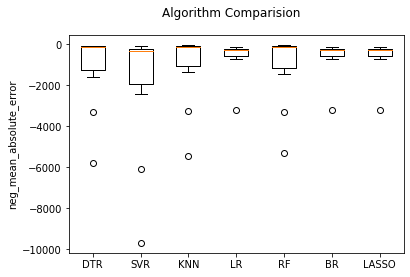

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

models=[]
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR(gamma='auto')))
models.append(('KNN',KNeighborsRegressor()))
models.append(('LR',LinearRegression()))
models.append(('RF',RandomForestRegressor()))
models.append(('BR',BayesianRidge()))
models.append(('LASSO',Lasso(alpha=0.1)))

results=[]
algos=[]
scoring='neg_mean_absolute_error'
for algo,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_results=cross_val_score(model,Xdata,Ydata,cv=kfold,scoring=scoring)
    results.append(cv_results)
    algos.append(algo)
    msg="%s:%f(%f)"%(algo,cv_results.mean(),cv_results.std())
    print(msg)

fig=plt.figure()
fig.suptitle("Algorithm Comparision")
ax=fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(algos)
ax.set_ylabel(scoring)
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.2)
rf = LinearRegression()
rf.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
rf_prediction = rf.predict(x_test)
#print(rf_prediction)
print()
#Print the actual values
#print(y_test)
print("Close Price of Current Month\t\tPredicted Price of Next Month")
for e1,e2 in zip(y_test,rf_prediction):
    print("{:.1f}\t\t\t\t\t{:.1f}".format(e1,e2))


Close Price of Current Month		Predicted Price of Next Month
2233.3					2554.3
10779.9					7799.8
251.0					491.9
6811.5					10074.8
276.5					485.4
1040.0					1348.7
449.4					656.1
106.3					380.9
359.2					604.4
2175.5					1501.3
1129.4					461.5
9330.5					5530.8
1180.0					1111.9
364.3					689.6
8723.9					7453.4
619.1					845.4
446.2					732.0
685.6					692.0
2518.7					2759.6
636.1					826.3
989.0					1204.9
673.1					963.5
325.8					617.0
227.2					535.4
224.9					485.0
432.5					621.8
975.9					944.9
17415.4					5684.6
660.8					972.7
651.0					798.4
447.2					744.8
819.0					961.5
7472.6					8837.9
768.1					915.2
1317.7					1227.9
244.3					495.1
127.1					369.7
482.3					814.7
641.6					670.1
442.4					569.7
133.0					399.1
338.1					502.9
8338.3					8906.6
6722.0					6216.2
619.3					800.9
6652.2					5935.4
772.8					933.5
2038.9					1473.9
6332.6					6277.2
15838.5					9200.8
264.1					537.4
4403.7					4722.9
1061.3					1104.4
770.8					921.3
8192.2					5642.2
475.3					8

### Set prediction_days_array equal to the last 30 rows of the original data set from the price column

In [13]:
prediction_days_array = np.array(bitcoindf.drop(['prediction'],axis=1))[-prediction_days:]
print(prediction_days_array)

[[6317.61]
 [6377.78]
 [6388.44]
 [6361.26]
 [6376.13]
 [6419.66]
 [6461.01]
 [6530.14]
 [6453.72]
 [6385.62]
 [6409.22]
 [6411.27]
 [6371.27]
 [6359.49]
 [5738.35]
 [5648.03]
 [5575.55]
 [5554.33]
 [5623.54]
 [4871.49]
 [4451.87]
 [4602.17]
 [4365.94]
 [4347.11]
 [3880.76]
 [4009.97]
 [3779.13]
 [3820.72]
 [4257.42]
 [4278.85]]


In [14]:
# Print the model predictions for the next 'n=30' days
rf_prediction = rf.predict(prediction_days_array)
print(rf_prediction)

[6018.6963 6073.3906 6083.08   6058.374  6071.8906 6111.459  6149.045
 6211.883  6142.419  6080.5166 6101.9688 6103.832  6067.4727 6056.7656
 5492.16   5410.0605 5344.177  5324.8887 5387.8    4704.199  4322.772
 4459.3916 4244.663  4227.547  3803.6428 3921.0925 3711.263  3749.0674
 4146.02   4165.5   ]


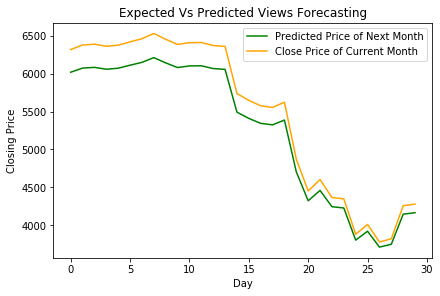

In [15]:
#xtest_data=x_test[0:30,:]
#ytest_data=y_test[0:30]
plt.figure(constrained_layout=True)
labels={'Close Price of Current Month','Predicted Price of Next Month'}
plt.plot(rf_prediction, color= 'green')
plt.plot(prediction_days_array, color= 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [16]:
print("Test set score: {:.2f}".format(rf.score(x_test, y_test)))

Test set score: 0.83


## Conclusion

The cryptocurrency market is a rapidly expanding canvas of trade and investment that has garnered the attention of traders, investors, entrepreneurs on  a worldwide scale  that is  unprecedented in  this century. By providing comparative studies and findings from the price data of bitcoin markets, it will further help document the behavior and habits of such a lucratively challenging and rapidly expanding market.
In conclusion,  this work deals  with dataset loading,descriptive statistics and plotting multivariate and univariate plots in order to  predict the price  direction of Bitcoin.